In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
np.random.seed(0)
x = 2 *np.random.rand(100,1)
y = 4+3 * x +np.random.randn(100,1)

x_b = np.c_[np.ones((100,1)),x]
#x_b

In [23]:
#batch gradient desent
def batch_gradient_desent(x,y,l_r=0.1,iterations=1000):
    m=len(y)
    theta = np.random.rand(2,1)
    for iterations in range(iterations):
        gradient = 2/m * x.T.dot(x.dot(theta)-y)
        theta = theta - l_r*gradient
    return theta

bgd = batch_gradient_desent(x_b,y)
print("BGD theta :",bgd)

BGD theta : [[4.55808002]
 [2.96827553]]


In [47]:
def stochastic_gradient_desent(x,y,l_r=0.1,iterations=50):
    m = len(y)
    theta = np.random.rand(2,1)
    for iterations in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = x[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = 2 * xi.T.dot(xi.dot(theta)-yi)
            theta = theta - l_r * gradient
    return theta

sgd = stochastic_gradient_desent(x_b,y)
print("SGD theta :",sgd)

SGD theta : [[4.34395979]
 [2.87392707]]


In [51]:
#Mini-Batch Gradient Descent
def Mini_batch_gradient_descent(x,y,learning_rate=0.1,iterations=50,batch_size=20):
  m = len(y)
  theta = np.random.rand(2,1)
  for iterations in range(iterations):
    shuffled_indices = np.random.permutation(m)
    x_shuffled = x[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,batch_size):
      xi = x_shuffled[i:i+batch_size]
      yi = y_shuffled[i:i+batch_size]
      gradients = 2/len(xi) * xi.T.dot(xi.dot(theta)-yi)
      theta = theta - learning_rate * gradients
    return theta

mbgd = Mini_batch_gradient_descent(x_b,y)
print("MBGD Theta :",mbgd)

MBGD Theta : [[3.35078888]
 [3.71450614]]


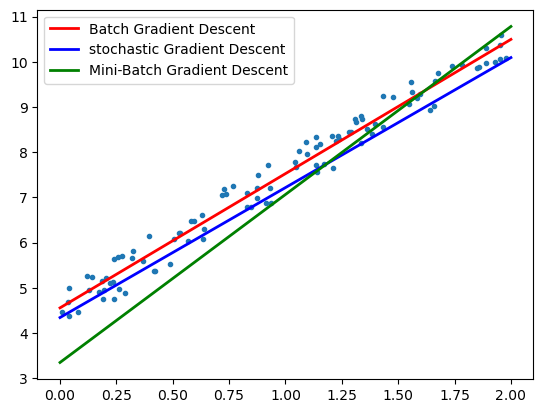

In [79]:
#plot
def plot_GD(x,y,bgd,sgd,mbgd):
    plt.plot(x,y,".")
    x_new = np.array([[0],[2]])
    x_new_b = np.c_[np.ones((2,1)),x_new]
    
    y_predict_bgd = x_new_b.dot(bgd)
    y_predict_sgd = x_new_b.dot(sgd)
    y_predict_mbgd = x_new_b.dot(mbgd)

    plt.plot(x_new,y_predict_bgd,"r-",linewidth=2,label = "Batch Gradient Descent")
    plt.plot(x_new,y_predict_sgd,"b-",linewidth=2,label = "stochastic Gradient Descent")
    plt.plot(x_new,y_predict_mbgd,"g-",linewidth=2,label = "Mini-Batch Gradient Descent")
    plt.legend(loc="upper left")
plot_GD(x,y,bgd,sgd,mbgd)

In [95]:
#Momentum based
x = np.array([[1,2],[3,4],[5,6]])
y = np.array([1,2,3])
theta = np.zeros(x.shape[1])
learning_rate = 0.01
iterations = 1000
gamma = 0.9

def gradient_descent_momentum(x,y,theta,learning_rate,iterations,gamma):
  m = len(y)
  velocity = np.zeros_like(theta)

  for i in range(iterations):
    gradients = 1/m * x.T.dot(x.dot(theta)-y)
    velocity = gamma * velocity - learning_rate * gradients
    theta = theta - velocity
  return theta

theta_momentum = gradient_descent_momentum(x,y,theta,learning_rate,iterations,gamma)
print("Momentum Theta :",theta_momentum)


Momentum Theta : [-2.73133479e+219 -3.45982492e+219]


Adagrad Theta : [[3.69035268]
 [2.65159052]]


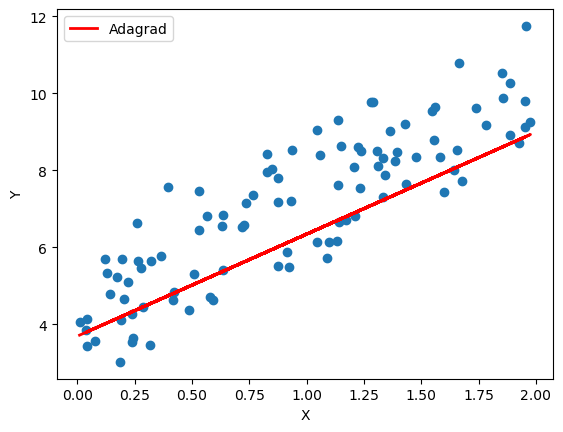

In [105]:
#Adagrad
#parameter for Adagrad
learning_rate = 0.1
epsilon = 1e-8
iterations = 1000

theta = np.random.randn(2,1)
gradient_accum = np.zeros((2,1))

for i in range(iterations):
  gradients = 2/len(x_b) * x_b.T.dot(x_b.dot(theta)-y)
  gradient_accum = gradient_accum + gradients**2
  adjusted_gradients = gradients / (np.sqrt(gradient_accum) + epsilon)
  theta = theta - learning_rate * adjusted_gradients
print("Adagrad Theta :",theta)

#plot
plt.scatter(x,y)
plt.plot(x,x_b.dot(theta),color = "red",linewidth = 2 ,label = "Adagrad")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

RMSprop Theta : [[4.17215108]
 [2.91846751]]


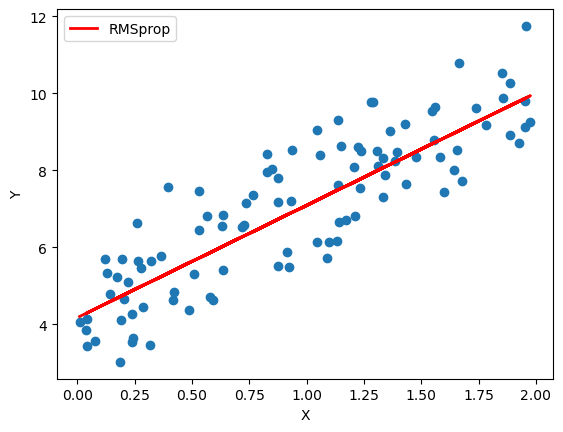

In [107]:
#RMSprop Optimizer

import matplotlib.pyplot as plt
import numpy as np
#RMSprop Optimizer
learning_rate = 0.1
gamma = 0.9
epsilon = 1e-8
iterations = 1000

theta = np.random.randn(2,1)
s = np.zeros_like(theta)

for i in range(iterations):
  gradients = 2/len(x_b) * x_b.T.dot(x_b.dot(theta)-y)
  s = gamma * s + (1-gamma) * gradients**2
  adjusted_gradients = gradients / (np.sqrt(s) + epsilon)
  theta = theta - learning_rate * adjusted_gradients
print("RMSprop Theta :",theta)

#plot
plt.scatter(x,y)
plt.plot(x,x_b.dot(theta),color = "red",linewidth = 2 ,label = "RMSprop")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
